In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [29]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [30]:
x, y = iris.data, iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


### stratify

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123, stratify=y)
print(x_train.shape[0])
print(x_test.shape[0])

105
45


In [32]:
label, count = np.unique(y, return_counts=True)
print('label is=', label)
print('the count from each label is=', count)
print('persentage=', count/len(y))

label is= [0 1 2]
the count from each label is= [50 50 50]
persentage= [0.33333333 0.33333333 0.33333333]


In [33]:
label, count = np.unique(y_train, return_counts=True)
print('label is=', label)
print('the count from each label is=', count)
print('persentage=', count/len(y_train))

label is= [0 1 2]
the count from each label is= [35 35 35]
persentage= [0.33333333 0.33333333 0.33333333]


In [34]:
label, count = np.unique(y_test, return_counts=True)
print('label is=', label)
print('the count from each label is=', count)
print('persentage=', count/len(y_test))

label is= [0 1 2]
the count from each label is= [15 15 15]
persentage= [0.33333333 0.33333333 0.33333333]


### train and test

In [35]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy score on test data= %.2f'%(accuracy*100)+ '%')

accuracy score on test data= 95.56%


In [36]:
'''y_pred = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print('accuracy score on train data= %.2f'%(accuracy*100)+ '%')'''

"y_pred = clf.predict(x_train)\naccuracy = accuracy_score(y_train, y_pred)\nprint('accuracy score on train data= %.2f'%(accuracy*100)+ '%')"

### Visualize results

In [37]:
print('samples correctly classified:')
correct_idx = np.where(y_pred == y_test)[0]
print(correct_idx)


print('samples incorrectly classified:')
incorrect_idx = np.where(y_pred != y_test)[0]
print(incorrect_idx)

samples correctly classified:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44]
samples incorrectly classified:
[ 0 37]


#### example for enumrate:

In [38]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons, start= 10))

[(10, 'Spring'), (11, 'Summer'), (12, 'Fall'), (13, 'Winter')]

### plot to see correct and incorrect classified items

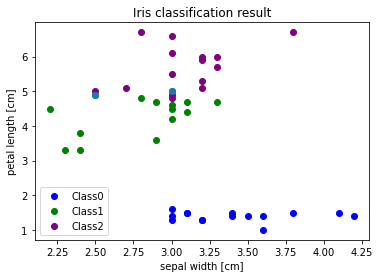

In [39]:
plt.figure(figsize=(6, 4))
colors = ['blue', 'green', 'purple']

for n, color in enumerate(colors):
    idx = np.where(y_test==n)[0]
    plt.scatter(x_test[idx, 1], x_test[idx, 2], color= color, label= 'Class%d'%n)

plt.scatter(x_test[incorrect_idx,1], x_test[incorrect_idx,2])
plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title('Iris classification result');

# Superised Learning -- Classification 

In [40]:
from sklearn.datasets import make_blobs

x, y = make_blobs(centers=2, random_state=0)

print('x.shape =',x.shape)
print('y.shape =',y.shape)

x.shape = (100, 2)
y.shape = (100,)


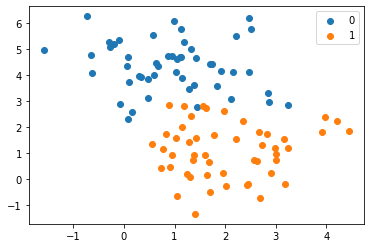

In [41]:
plt.scatter(x[y==0, 0], x[y==0,1], label='0')
plt.scatter(x[y==1, 0], x[y==1,1], label='1')
plt.legend();

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred = clf.predict(x_test)

In [46]:
print(np.mean(y_pred==y_test))

0.96


In [47]:
print(clf.score(x_test, y_test))

0.96


In [48]:
from plot_2d_separator import plot_2d_separator

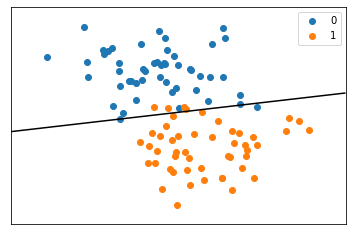

In [49]:
plt.scatter(x[y==0, 0], x[y==0,1], label='0')
plt.scatter(x[y==1, 0], x[y==1,1], label='1')
plt.legend()
plot_2d_separator(clf, x);

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

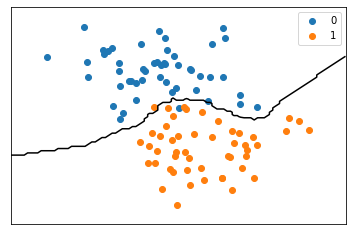

In [51]:
plt.scatter(x[y==0, 0], x[y==0,1], label='0')
plt.scatter(x[y==1, 0], x[y==1,1], label='1')
plt.legend()
plot_2d_separator(knn, x);

In [52]:
print(knn.score(x_test, y_test))

0.96
